<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Introduction to DS
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

## Import

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier

## Data preparation

In [32]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv').copy()

In [33]:
clean_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
24293,kW8_l57w74g,Seattle Data Guy,Top Courses To Become A Data Engineer In 2022,Learning how to become a data engineer in 2022...,data science|data engineer|how to become a dat...,2022-01-28 15:08:04+00:00,127432,4079,156,911,hd,False,15,28,4,1,2022
45388,e3S6sJDqMos,Quantitative Social Science Data Analysis,Chapter 14 Video 6 - Negative Binomial Regress...,"In this video, we plot predicted counts for ne...",tidyverse|ggplot2|negative binomial|predicted ...,2022-11-07 03:29:11+00:00,226,1,0,484,hd,False,3,7,0,11,2022
19105,72hcAUpaBMs,DataCamp,R Tutorial : Basic statistical analysis,Want to learn more? Take the full course at ht...,Designing and Analyzing Clinical Trials in R|D...,2020-03-13 06:33:09+00:00,959,8,1,294,hd,False,6,13,4,3,2020
25157,Kr4XMaZl6Q4,BEPEC by Kanth - #BuildExperience & Get Hired!,What is Descriptive Analytics?,Get Flat 30% Discount(YMLCT30) on your Machine...,what is descriptive analytics?|descriptive sta...,2020-06-30 09:45:49+00:00,8291,89,5,446,hd,False,9,30,1,6,2020
47334,pjERUd6QG-8,Connor Shorten,Henry AI Labs,Learn about Deep Learning and Artificial Intel...,Deep Learning,2019-05-20 19:55:20+00:00,23797,62,0,25,hd,False,19,20,0,5,2019


## Problem Statement
- <font color=lightgreen>Problem</font>: Classify videos into trending or non-trending categories, the goal is to predict whether a video is likely to become "Trending" or not.
- <font color=lightgreen>What are the benefits of solving this problem ?</font> 
    - Predicting video trends can bring significant benefits to online video platforms, content managers, advertisers, and enhance user experiences. It's useful for predicting trends and helps content creators optimize their video release strategies.The key is leveraging insights from the classification model to optimize strategies and deliver the best value for both users and content managers.

## Feature engineering

### Select features (independent variables) and the target variable (dependent variable)
- Here, we will construct a classification model for predicting the video engagement. Our target variable will be `Trending` and we will examine our columns to select suitable features.
- Firstly, we have to create the new feature `Trending` based on `viewCount`.
- <font color=red>Noted:</font> We assume that `low`: 0, `medium`: 1, `high`: 2

Visualize the distribution of engagement values

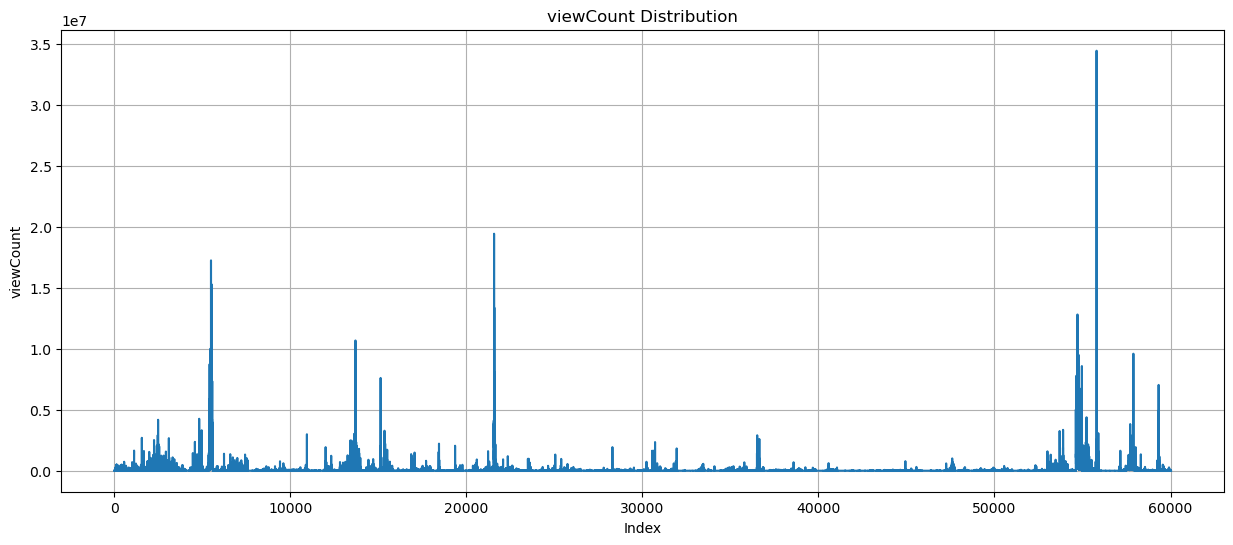

In [34]:
plt.figure(figsize=(15, 6))
plt.plot(clean_df['viewCount'])
plt.title('viewCount Distribution')
plt.xlabel('Index')
plt.ylabel('viewCount')
plt.grid(True)
plt.show()

Create a `Trending` column based on our criteria for the `viewCount` values, where labels 'low', 'medium', 'high' are assigned based on the mean value.

In [35]:
# calculate mean of viewCount
mean_engagement = clean_df['viewCount'].mean()

# assign labels based on the engagement
clean_df['Trending'] = pd.cut(clean_df['viewCount'], 
                               bins=[float('-inf'), mean_engagement, mean_engagement *10, float('inf')], 
                               labels=False)

## Baseline model comparison

In [36]:
X = clean_df[['likeCount', 'commentCount', 'hour', 'day', 'month', 'year']]
y = clean_df['Trending']

In [37]:
# dividing data into train, valid and test sets
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y ,test_size=0.3, random_state= 2023,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp ,test_size=0.5, random_state= 2023,stratify=y_tmp)

In [38]:
seed = 2023
models = [
    LinearSVC(random_state=seed, dual=False, max_iter=1000),
    SVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

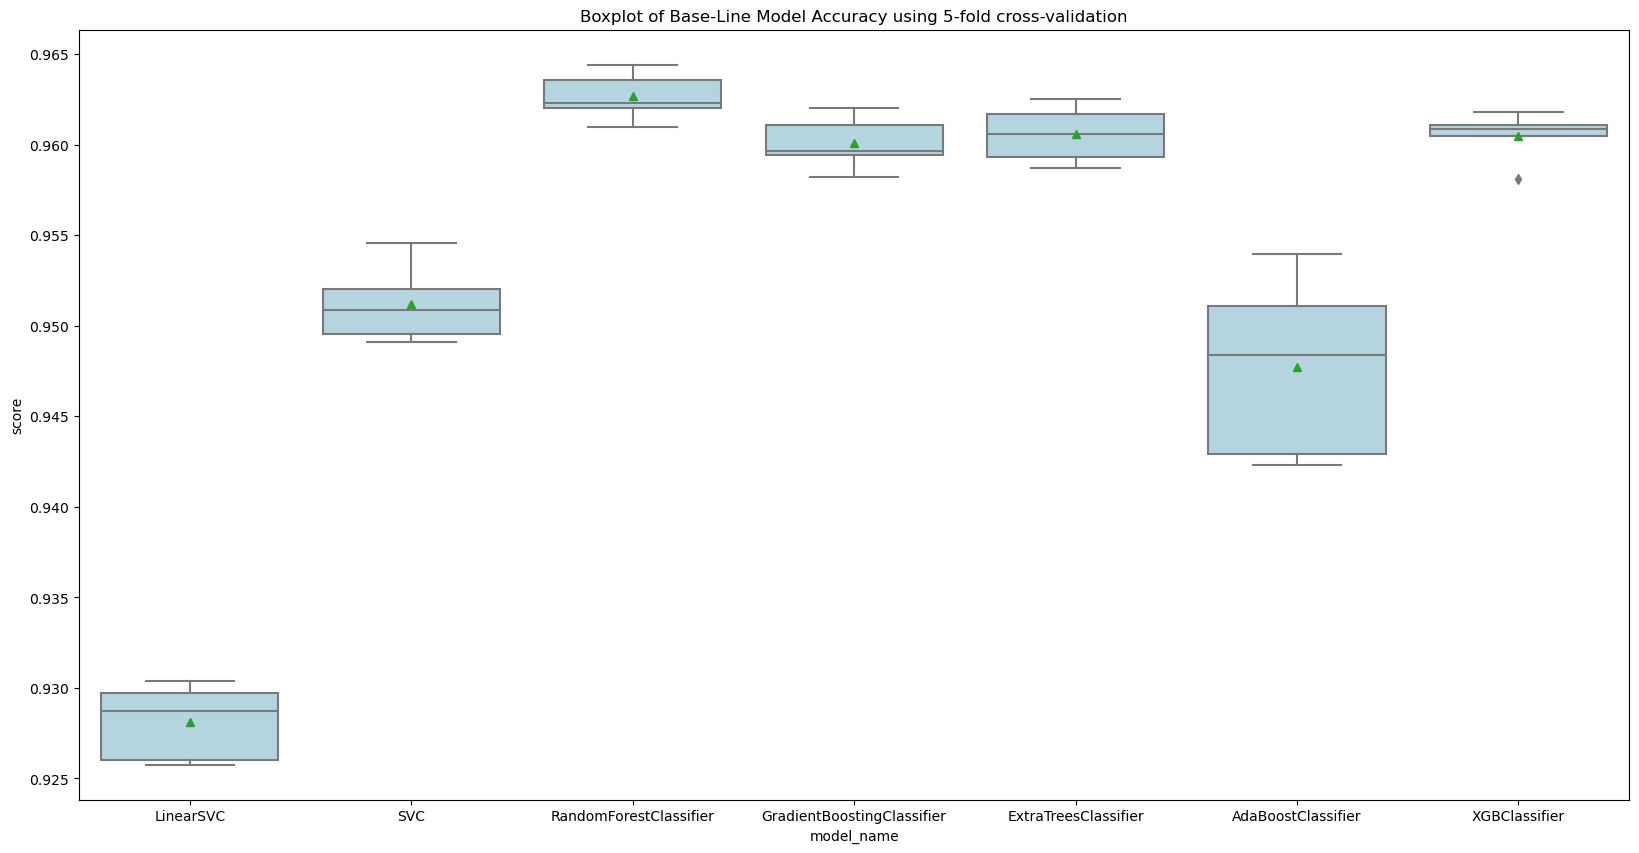

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.962662,0.001356
ExtraTreesClassifier,0.960568,0.001588
XGBClassifier,0.960473,0.001402
GradientBoostingClassifier,0.960092,0.001491
SVC,0.951216,0.002198
AdaBoostClassifier,0.947718,0.005087
LinearSVC,0.928109,0.002127


In [39]:
def generate_baseline_result(models, X, y, metrics, cv, plot_result=False):
    # define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'score'])
    
    mean = cv_df.groupby('model_name')['score'].mean()
    std = cv_df.groupby('model_name')['score'].std()
    
    baseline_results = pd.concat([mean,std],axis =1, ignore_index=True)
    baseline_results.columns =['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace = True)
    
    if plot_result:
        plt.figure(figsize=(20, 10))
        sns.boxplot(x ='model_name',y = 'score', data = cv_df, color ='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.show()
    
    return baseline_results

generate_baseline_result(models, X_train, y_train, metrics='accuracy',cv=5,plot_result =True )

## Fine - tune

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_val, y_val)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

## Re-train

In [41]:
final_model_train_valid = RandomForestClassifier(random_state=2023, **best_params)

X_train_valid = pd.concat([X_train, X_val], axis=0)
y_train_valid = pd.concat([y_train, y_val], axis=0)
final_model_train_valid.fit(X_train_valid, y_train_valid)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=2023)

## Test on test set

In [42]:
y_pred_final_train_valid = final_model_train_valid.predict(X_test)
accuracy_final_train_valid = accuracy_score(y_test, y_pred_final_train_valid)

## Evaluation

In [43]:
print(f"Accuracy of the Final Model on Test Set: {accuracy_final_train_valid}")

Accuracy of the Final Model on Test Set: 0.9639089394780678


## Visualize

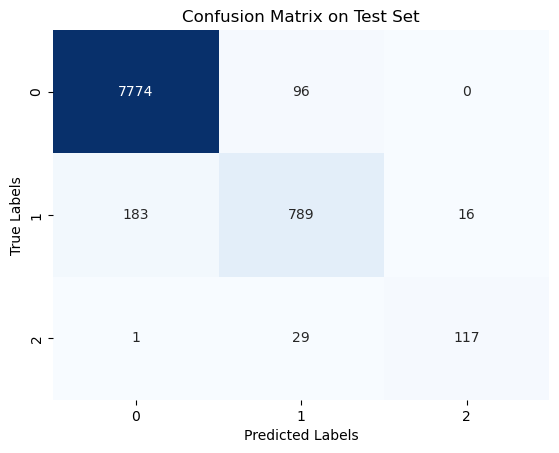

In [44]:
cm = confusion_matrix(y_test, y_pred_final_train_valid)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test Set')
plt.show()

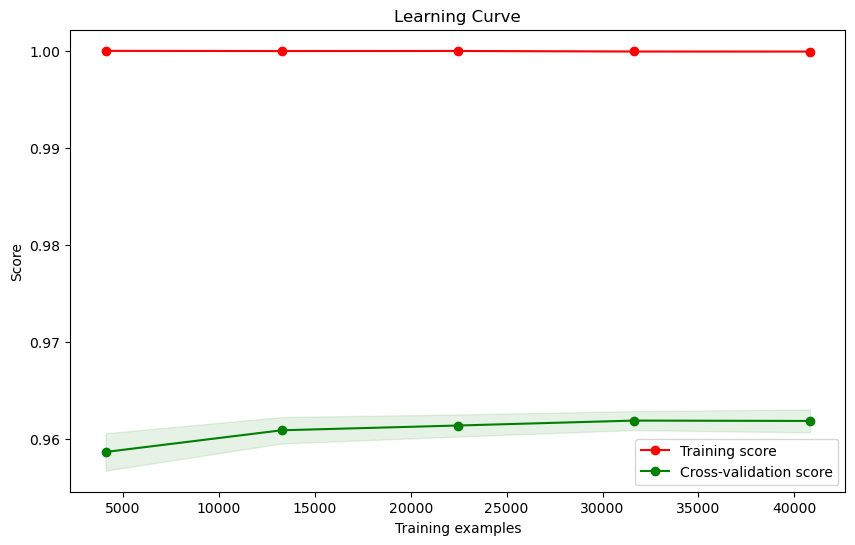

In [45]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g"
    )

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

model = RandomForestClassifier(random_state=2023, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

plot_learning_curve(model, "Learning Curve", X_train_valid, y_train_valid, cv=cv, n_jobs=-1)
plt.show()